# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return (np.mean((np.dot(X,w)-y)**2))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        t=X.transpose()
        loss=(np.dot(X,w)-y)
        answer=np.dot(t,loss)
        return(answer*2/(len(y)))


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:

    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    answer=[w_init]
    for i in range(n_iterations):
      w_init=w_init-lr*(loss.calc_grad(X, y, w_init))
      answer.append(w_init)
    return answer



Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 1000)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))


425.58917680450253
0.8670644395649091


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

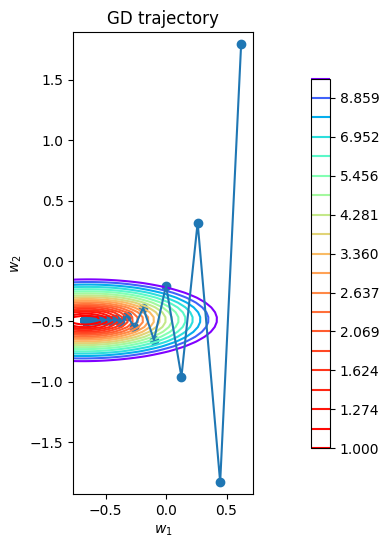

In [ ]:
w_list = gradient_descent(w_init, X, y, loss, 0.01, 1000)
plot_gd(w_list, X, y, loss)

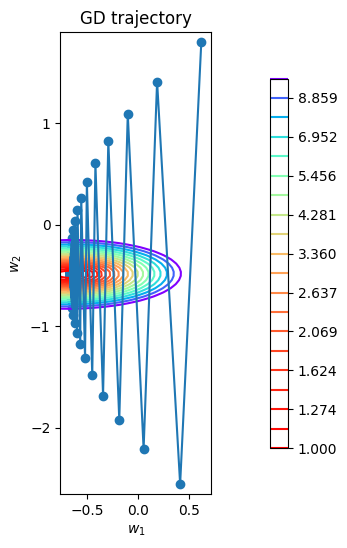

In [ ]:
w_list1 = gradient_descent(w_init, X, y, loss, 0.012, 10000)
plot_gd(w_list1, X, y, loss)

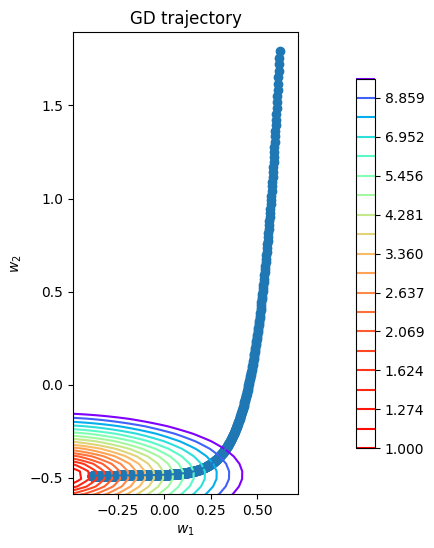

In [ ]:
w_list2 = gradient_descent(w_init, X, y, loss, 0.0001, 1000)
plot_gd(w_list2, X, y, loss)

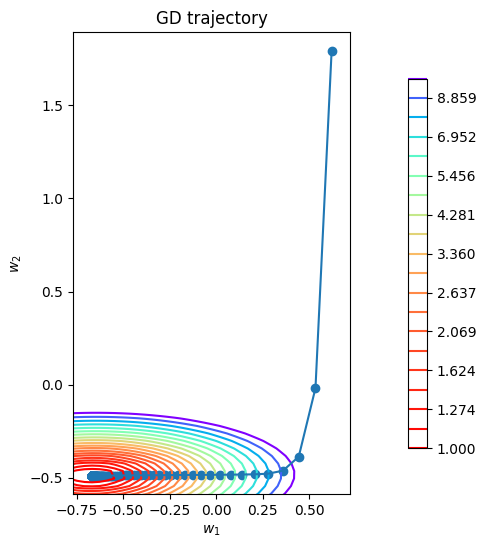

In [ ]:
w_list3 = gradient_descent(w_init, X, y, loss, 0.005, 1000)
plot_gd(w_list3, X, y, loss)

In [ ]:
# параметр lr - шаг влияет на скорость достижения минимума, если взять его маленьким, как на предпоследнем графике, то точки по траектории распространятся
# равномерно, не перескакивая локальный экстремум, если же взять его больше, то есть вероятность его перепрыгнуть и 'скакать' туда-сюда(график 2).

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --

    answer=[w_init]
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      y_new=y[batch_indices]
      w_init=w_init-lr*(loss.calc_grad(batch, y_new, w_init))
      answer.append(w_init)
    return answer

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

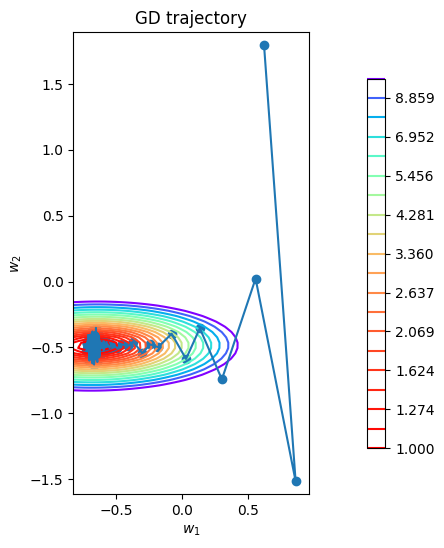

In [ ]:
# -- YOUR CODE HERE --
w_list4 = stochastic_gradient_descent(w_init, X, y, loss, 0.01,30, 1000)
plot_gd(w_list4, X, y, loss)

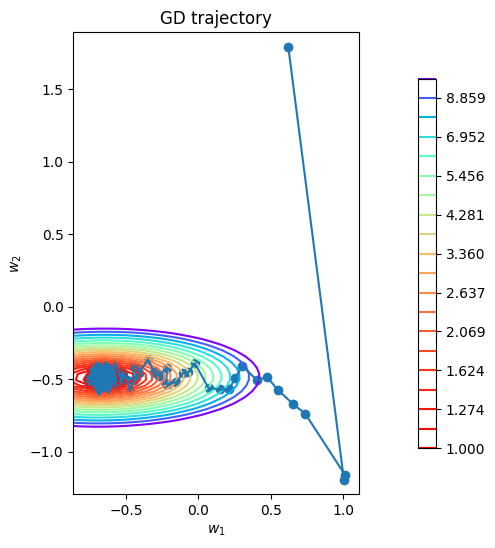

In [ ]:
w_list5 = stochastic_gradient_descent(w_init, X, y, loss, 0.005,5, 1000)
plot_gd(w_list5, X, y, loss)

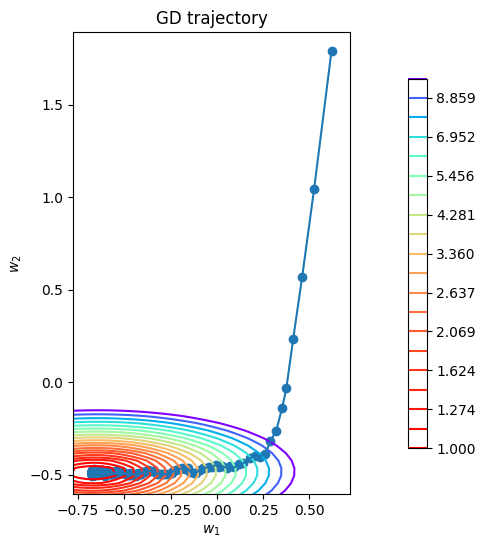

In [ ]:
w_list6 = stochastic_gradient_descent(w_init, X, y, loss, 0.0019,50, 1000)
plot_gd(w_list6, X, y, loss)

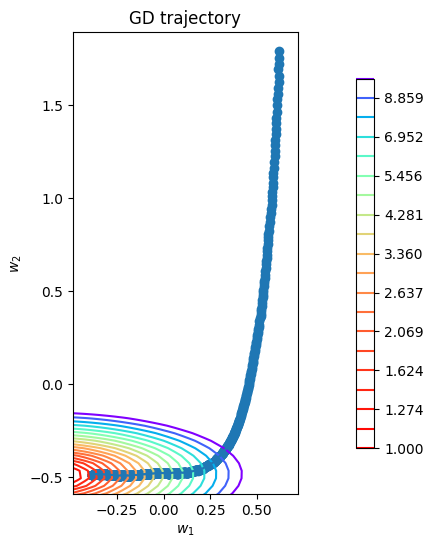

In [ ]:
w_list7 = stochastic_gradient_descent(w_init, X, y, loss, 0.0001,50, 1000)
plot_gd(w_list7, X, y, loss)

In [ ]:

# параметры lr и batch_size существенно влияют на поведение стохастического градиентного спуска: если взять слишком маленький батч, то
# траектория спуска будет становиться ломанной и  сильно 'вилять' из-за уменьшения точности градиента, так как берем только малую часть объектов
# параметр lr - шаг влияет на скорость достижения минимума, если взять его маленьким, как на последнем графике, то точки по траектории распространятся
# равномерно, не перескакиваю локальный экстремум, если же взять его больше то есть вероятность его перепрыгнуть и 'скакать' туда-сюда.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    answer=[w_init]

    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch = X[batch_indices]
      y_new=y[batch_indices]
      new_lr=lr*((1/(1+i))**p)
      w_init=w_init-new_lr*(loss.calc_grad(batch, y_new, w_init))
      answer.append(w_init)
    return answer

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

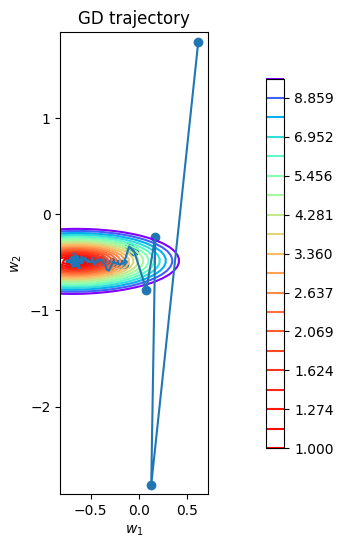

In [ ]:
# -- YOUR CODE HERE --
w_list8 = stochastic_gradient_descent(w_init,X,y,loss,0.01,10,0.2,1000)
plot_gd(w_list8, X, y, loss)



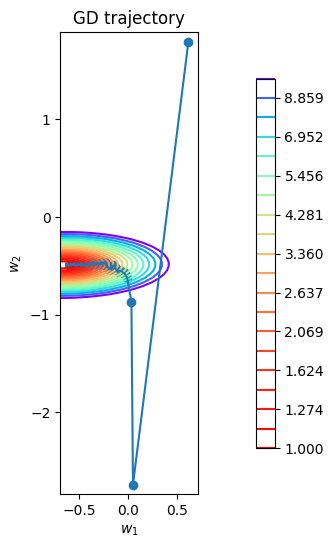

In [ ]:
w_list8 = stochastic_gradient_descent(w_init,X,y,loss,0.01,10,0.8,1000)
plot_gd(w_list8, X, y, loss)

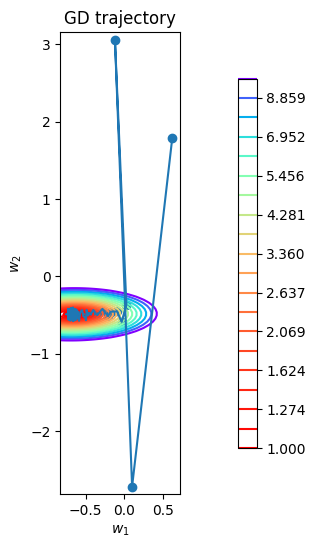

In [ ]:
w_list8 = stochastic_gradient_descent(w_init,X,y,loss,0.01,10,0.1,1000)
plot_gd(w_list8, X, y, loss)

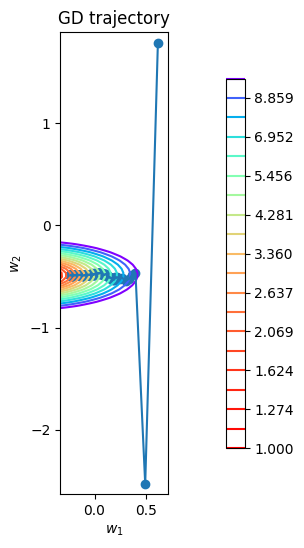

In [ ]:
w_list8 = stochastic_gradient_descent(w_init,X,y,loss,0.01,10,1,1000)
plot_gd(w_list8, X, y, loss)

In [ ]:
# чем ближе p к 1, тем медленее будут уменьшаться шаги на каждой итерации, это хорошо видно на графиках выше

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [ ]:
# -- YOUR CODE HERE --
loss = MSELoss()
loss.calc_loss(X,y,w_init)
a=stochastic_gradient_descent(w_init, X, y, loss, 0.001,10,0.7 ,100)
answer1=[]
for i in a:
  answer1.append((loss.calc_loss(X,y,i)))



In [ ]:
loss = MSELoss()
loss.calc_loss(X,y,w_init)
a=gradient_descent(w_init, X, y, loss, 0.001,100)
answer2=[]
for i in a:
  answer2.append(loss.calc_loss(X,y,i))




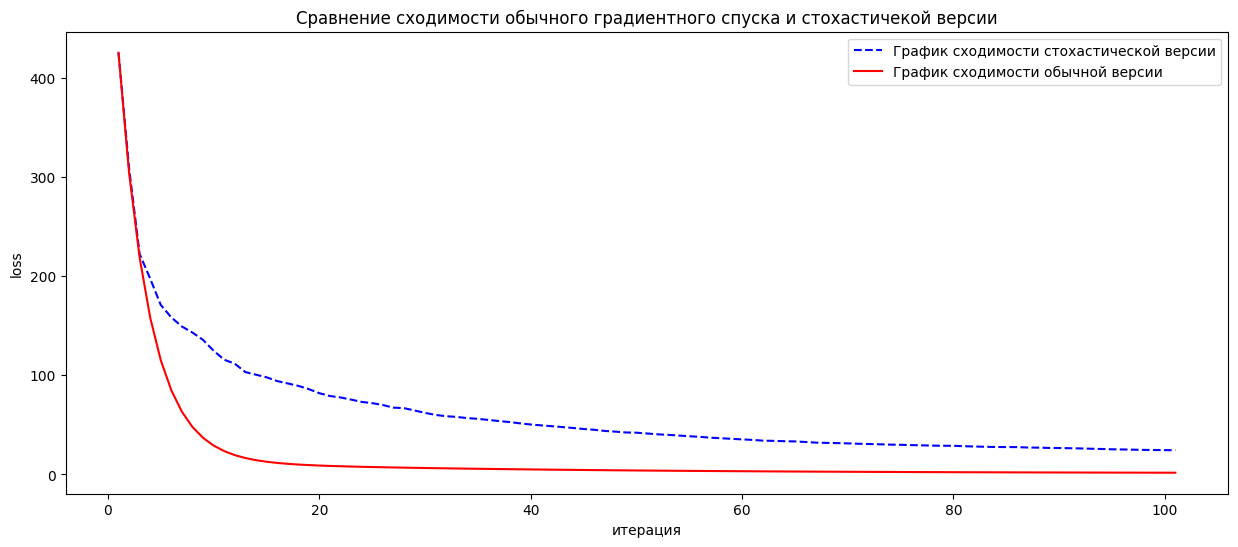

In [ ]:
number_iteration = np.arange(1, 102)
plt.figure(figsize=(15, 6))
plt.plot(number_iteration, answer1, label='График сходимости стохастической версии', color='blue', linestyle='--')
plt.plot(number_iteration, answer2, label='График сходимости обычной версии', color='red', linestyle='-')
plt.legend()
plt.title('Сравнение сходимости обычного градиентного спуска и стохастичекой версии')
plt.xlabel('итерация')
plt.ylabel('loss')
plt.show()
# мы видим, что обычная версия быстрее приходит к меньшему loss, но за счет свойств стохастической версии, она работает сильно быстрее. Поэтому на графики не видно преимущества SGD

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:

class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        np.random.seed(44)
        w_init = np.random.uniform(-2, 2, X.shape[1])

        a=gradient_descent(w_init, X, y, self.loss,self.lr,10000)
        self.w=a[-1]


        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
      # -- YOUR CODE HERE --
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        answer=np.dot(X,self.w)
        return(answer)




Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [ ]:
X_raw

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
# -- YOUR CODE HERE --
X_raw.isna().sum()
# видим nan

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

In [ ]:
X_prepared = X_raw.copy()
X_prepared[5] = X_prepared[5].fillna(X_prepared[5].mode()[0])

print(X_raw.isna().sum().sum())
print(X_prepared.isna().sum().sum())
# избавились от категариальных пропусков, взяв моду



51
49


In [ ]:
cols_to_fill = [1, 18, 19, 21,22]
for col in cols_to_fill:
    X_prepared[col] = X_prepared[col].fillna(X_prepared[col].mean())

X_prepared.isna().sum()
# заменили числовые пропуски на среднее

index    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
dtype: int64

In [ ]:

one_hot_2 = pd.get_dummies(X_prepared[2]).astype(int)
one_hot_3 = pd.get_dummies(X_prepared[3]).astype(int)
one_hot_4 = pd.get_dummies(X_prepared[4]).astype(int)
one_hot_5 = pd.get_dummies(X_prepared[5]).astype(int)
one_hot_6 = pd.get_dummies(X_prepared[6]).astype(int)
one_hot_7 = pd.get_dummies(X_prepared[7]).astype(int)
one_hot_8 = pd.get_dummies(X_prepared[8]).astype(int)
one_hot_14 = pd.get_dummies(X_prepared[14]).astype(int)
one_hot_15 = pd.get_dummies(X_prepared[15]).astype(int)
one_hot_17 = pd.get_dummies(X_prepared[17]).astype(int)
one_hot_encoded = pd.concat([one_hot_2, one_hot_3, one_hot_4,one_hot_5,one_hot_6,one_hot_7,one_hot_8,one_hot_14,one_hot_15,one_hot_17], axis=1)

X_preparedfinal=pd.concat([X_prepared,one_hot_encoded],axis=1)
X_preparedfinal =X_preparedfinal.drop(['index',2,3,4,5,6,7,8,14,15,17], axis=1)
X_preparedfinal
# сделали one hot

,0,1,9,10,11,12,13,16,18,19,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(369)
X_train, X_test, y_train, y_test = train_test_split(X_preparedfinal, y, test_size=0.3)
X_train
# разделили выборку

,0,1,9,10,11,12,13,16,18,19,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
179,2,122.0,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
144,0,85.0,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,...,0,0,0,1,0,0,0,0,0,0
114,0,161.0,108.0,186.7,68.3,56.0,3130,134,3.61,3.21,...,0,0,0,0,0,0,0,1,0,0
183,2,94.0,97.3,171.7,65.5,55.7,2319,97,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,3,256.0,94.5,165.7,64.0,51.4,2221,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
18,1,98.0,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,...,0,0,0,1,0,0,0,0,0,0
109,0,161.0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,...,0,0,0,0,0,1,0,0,0,0
14,0,122.0,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.columns = X_train.columns.astype(str)
X_train
# отнормировали значения

,0,1,9,10,11,12,13,16,18,19,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
179,0.861178,-0.043101,-0.254991,-0.232321,-0.181340,0.783961,-0.711540,-0.443719,-0.536181,0.491415,...,0,0,0,0,0,0,0,1,0,0
144,-0.694498,-1.165019,-0.320795,-0.078711,-0.228617,0.468687,-0.309926,-0.465500,1.081539,-1.899114,...,0,0,0,1,0,0,0,0,0,0
114,-0.694498,1.139462,1.505267,0.980391,1.142409,0.902188,1.041478,0.100817,1.043917,-0.106217,...,0,0,0,0,0,0,0,1,0,0
183,0.861178,-0.892120,-0.254991,-0.232321,-0.181340,0.783961,-0.502168,-0.705096,-1.213366,0.491415,...,0,0,0,0,0,1,0,0,0,0
199,-1.472336,-0.861798,1.686228,1.150171,1.426070,0.705142,1.207073,0.340413,-1.213366,0.491415,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1.639015,4.020063,-0.715619,-0.717406,-0.890492,-0.910633,-0.688699,-0.443719,-0.536181,0.491415,...,0,0,0,0,0,0,0,1,0,0
18,0.083340,-0.770832,-0.715619,-1.509711,-1.079599,-0.674178,-1.349174,-0.857566,-1.138123,-0.420760,...,0,0,0,1,0,0,0,0,0,0
109,-0.694498,1.139462,1.488816,0.980391,1.189686,1.178052,1.273691,0.492883,1.382510,0.868867,...,0,0,0,0,0,1,0,0,0,0
14,-0.694498,-0.043101,0.764972,1.166341,0.480535,0.783961,1.231817,1.734424,1.081539,0.459961,...,0,0,0,0,0,0,0,1,0,0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
# -- YOUR CODE HERE --
model = LinearRegression(MSELoss())
model.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)
print(f' MSELoss на train: {mse_train}')
print(f' MSELoss на test: {mse_test}')


 MSELoss на train: 1814304.0407475212
 MSELoss на test: 5819334.362369788


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:

class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
        # print(self.coef)

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        w_new = w[:, :-1]
        return (np.mean((np.dot(X,w)-y)**2)+(self.coef*np.sum(w_new** 2)))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        t=X.transpose()
        loss=(np.dot(X,w)-y)
        answer=np.dot(t,loss)
        w_null = np.append(w[:-1],0)
        return(answer*2/(len(y))+2*self.coef*w_null)


Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1))


**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
# -- YOUR CODE HERE --
model2 = LinearRegression(MSEL2Loss(0.01))
model2.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
predictions_train2 = model2.predict(X_train)
predictions_test2 = model2.predict(X_test)
mse_train = mean_squared_error(y_train, predictions_train2)
mse_test = mean_squared_error(y_test, predictions_test2)
print(f' MSEL2Loss на train: {mse_train}')
print(f' MSEL2Loss на test: {mse_test}')

 MSEL2Loss на train: 2603264.7949404186
 MSEL2Loss на test: 4600942.54782738


In [ ]:
model = LinearRegression(MSELoss())
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)
print(f' MSEloss на train: {mse_train}')
print(f' MSEloss на test: {mse_test}')

 MSEloss на train: 1814304.0407475212
 MSEloss на test: 5819334.362369788


In [ ]:
# как мы видим результат на train стал больше, что указывает на то, что мы избавились от переобучения, а на teste L2 регуляризация помогает сильно уменьшить ошибку

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        a=0
        for i in range (len(y)):
          z=np.dot(X[i],w)-y[i]
          if np.abs(z) < self.eps:
            a+=0.5*np.dot(z,z)
          else:
            a+=self.eps*(np.abs(z)-0.5*self.eps)
        return a/len(y)




    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        grad = np.zeros_like(w)
        for i in range(len(y)):
          z = np.dot(X[i], w) - y[i]
          if  np.abs(z) < self.eps:
            grad+=X[i]*z
          else:
            grad+=X[i]*self.eps*np.sign(z)
        answer=grad/len(y)
        return answer








**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
# -- YOUR CODE HERE --
model3 = LinearRegression(HuberLoss(1100))
model3.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
predictions_train3 = model3.predict(X_train)
predictions_test3 = model3.predict(X_test)
mse_train3 = mean_squared_error(y_train, predictions_train3)
mse_test3 = mean_squared_error(y_test, predictions_test3)
print(f' huberloss на train: {mse_train3}')
print(f' huberloss на test: {mse_test3}')

 huberloss на train: 2320006.2808926553
 huberloss на test: 4057034.5147169274


In [ ]:
model = LinearRegression(MSELoss())
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)
print(f' MSEloss на train: {mse_train}')
print(f' MSEloss на test: {mse_test}')


 MSEloss на train: 1814304.0407475212
 MSEloss на test: 5819334.362369788


In [ ]:
# как мы видим за счет того, что выбросы были обработаны линейно, huberloss дал существенно меньшую ошибку на test, в то время как ошибка на train стала чуть больше

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# -- YOUR MEME HERE --


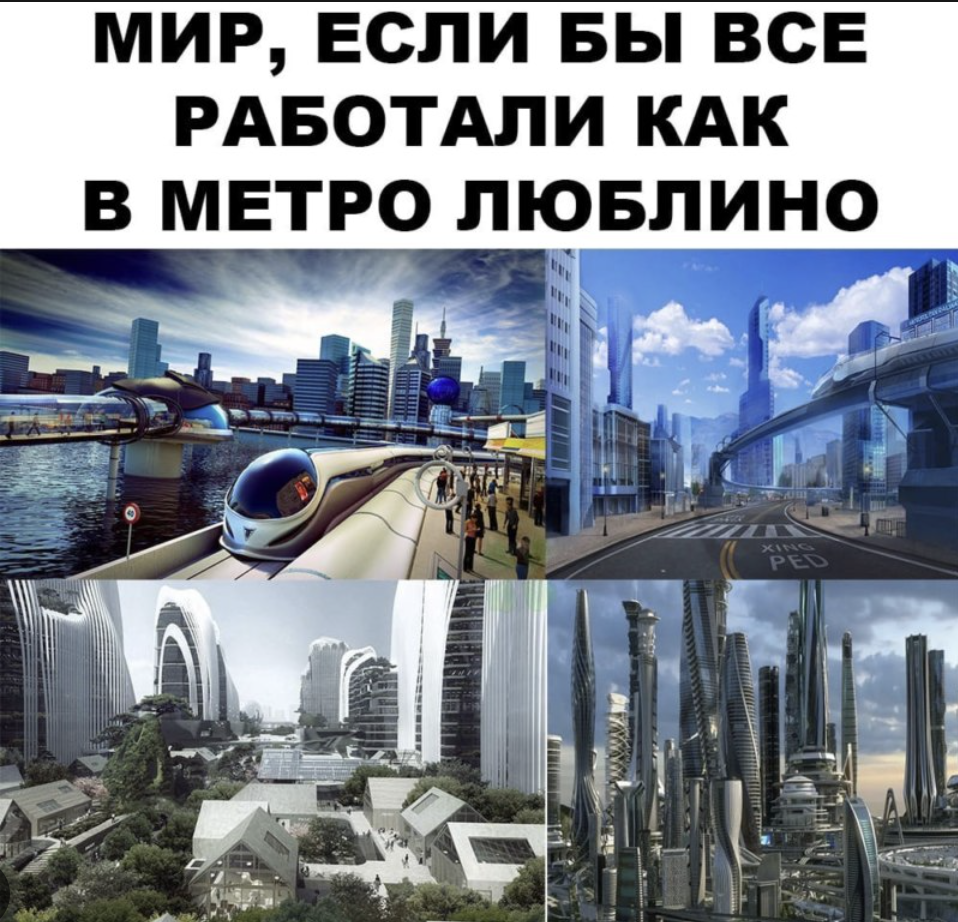

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE --
def Simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    temp: float,
    coef: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:

    curr_weights = w_init
    best_weights = w_init
    curr_temp = temp
    curr_loss = loss.calc_loss(X,y,w_init)
    best_loss = curr_loss
    answer=[]
    allloss=[]
    allloss.append(loss.calc_loss(X,y,w_init))
    for i in range(n_iterations):
        new_weights = curr_weights + np.random.standard_t(1, size=curr_weights.shape)
        new_loss = loss.calc_loss(X,y,new_weights)
        allloss.append(new_loss)

        if (new_loss<curr_loss or np.exp((curr_loss - new_loss) / curr_temp)>np.random.rand()):
            curr_weights = new_weights
            curr_loss = new_loss

            if (new_loss<best_loss):
                best_weights = new_weights
                best_loss = new_loss
                answer.append(best_loss)

        curr_temp *= coef

    return best_weights,best_loss,answer,allloss




In [ ]:
np.random.seed(44)
w_init = np.random.uniform(-2, 2, X_test.shape[1])
loss = MSELoss()
e=Simulated_annealing(w_init,X_train,y_train,loss,1000,0.87,10000)




<ipython-input-758-3b3dc3e9e179>:25: RuntimeWarning: overflow encountered in scalar divide
  if (new_loss<curr_loss or np.exp((curr_loss - new_loss) / curr_temp)>np.random.rand()):


In [ ]:
answer1=np.dot(X_train,e[0])
answer2=np.dot(X_test,e[0])
mse_test5 = mean_squared_error(y_train, answer1)
mse_train5 = mean_squared_error(y_test, answer2)
model5 = LinearRegression(MSELoss())
model5.fit(X_train, y_train)
predictions_train = model5.predict(X_train)
predictions_test = model5.predict(X_test)
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

print(f'Ошибка в алгоритме отжига на train  {mse_test5}')
print(f'ошибка в алгоритме отжига на test  {mse_train5}')

print(f'Ошибка в градиентном спуске на train  {mse_train}')
print(f'Ошибка в градиентном спуске на test  {mse_test}')

Ошибка в алгоритме отжига на train  1951374.5649919987
ошибка в алгоритме отжига на test  5193615.1121394625
Ошибка в градиентном спуске на train  1814304.0407475212
Ошибка в градиентном спуске на test  5819334.362369788


In [ ]:
# как мы видим метод отжига показывает +- такую же ошибку на 10000 итерациях. Стоит заметить, что при 100000 итерациях ошибка в методе отжига существенно меньше, чем при градиентном спуске
# я это связываю с переобучением

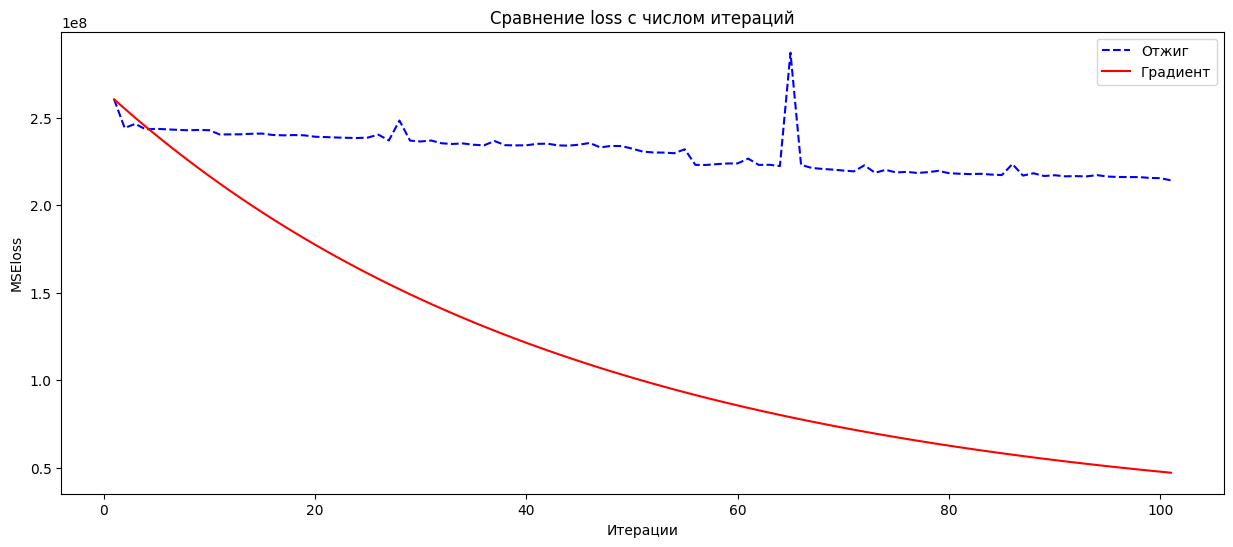

In [ ]:
np.random.seed(44)
loss = MSELoss()
w_init = np.random.uniform(-2, 2, X_test.shape[1])
loss = MSELoss()
e=Simulated_annealing(w_init,X_train,y_train,loss,1000,0.87,100)
c=e[0]

loss = MSELoss()

a=gradient_descent(w_init, X_train, y_train, loss, 0.001,100)
answer2=[]
for i in a:
  answer2.append(loss.calc_loss(X_train,y_train,i))
len(answer2)


number_iteration = np.arange(1, 102)
plt.figure(figsize=(15, 6))
plt.plot(number_iteration, e[3], label='Отжиг', color='blue', linestyle='--')
# Построение второго графика
plt.plot(number_iteration, answer2, label='Градиент', color='red', linestyle='-')


plt.legend()


plt.title('Сравнение loss с числом итераций')
plt.xlabel('Итерации')
plt.ylabel('MSEloss')

plt.show()

In [ ]:
# на графике видно, что метод отжига иногда с некоторой вероятность берет веса при которых ошибка больше('волны' вверх на графике)